# Housing Price Analysis Using Linear Regression

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

## Load and Explore Dataset

In [3]:
df = pd.read_csv('housing_prices.csv')
print(f"Dataset shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1000, 12)

Columns: ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'year_built', 'lot_size', 'garage_spaces', 'distance_to_downtown', 'school_quality', 'crime_rate', 'median_income', 'zoning_type']

First 5 rows:


,price,sqft_living,bedrooms,bathrooms,year_built,lot_size,garage_spaces,distance_to_downtown,school_quality,crime_rate,median_income,zoning_type
0,501682,2048,4,3,2003,7424,0,0.75,10,18.80,81250,Mixed
1,351746,1731,1,3,1982,1000,0,6.29,6,65.31,73597,Residential
2,383997,2124,3,1,1999,9305,2,18.02,4,14.85,90978,Mixed
3,525047,2562,5,3,1987,7646,2,20.39,8,55.43,64009,Mixed
4,421771,1683,3,3,1976,8525,2,3.41,7,52.71,83715,Mixed


In [37]:
print("Dataset Info:")
df.info()
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 1000 non-null   int64  
 1   sqft_living           1000 non-null   int64  
 2   bedrooms              1000 non-null   int64  
 3   bathrooms             1000 non-null   int64  
 4   year_built            1000 non-null   int64  
 5   lot_size              1000 non-null   int64  
 6   garage_spaces         1000 non-null   int64  
 7   distance_to_downtown  1000 non-null   float64
 8   school_quality        1000 non-null   int64  
 9   crime_rate            1000 non-null   float64
 10  median_income         1000 non-null   int64  
 11  zoning_type           1000 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 93.9+ KB

Basic Statistics:


,price,sqft_living,bedrooms,bathrooms,year_built,lot_size,garage_spaces,distance_to_downtown,school_quality,crime_rate,median_income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,397055.087000,1810.083000,3.045000,1.985000,1986.526000,6965.191000,0.994000,5.015910,5.572000,51.643120,70051.002000
std,65652.402496,488.417362,1.424431,0.835148,20.659238,3015.319814,0.802875,4.909934,3.010295,29.246483,15290.117594
min,173865.000000,500.000000,1.000000,1.000000,1950.000000,1000.000000,0.000000,0.500000,1.000000,0.160000,30000.000000
25%,349711.750000,1476.500000,2.000000,1.000000,1969.000000,4801.000000,0.000000,1.377500,3.000000,27.022500,59784.000000
50%,400009.500000,1812.500000,3.000000,2.000000,1987.000000,6986.000000,1.000000,3.480000,6.000000,52.695000,69998.500000
75%,442935.000000,2124.000000,4.000000,3.000000,2005.000000,9013.750000,2.000000,6.615000,8.000000,77.652500,80511.750000
max,618450.000000,3726.000000,5.000000,3.000000,2021.000000,18779.000000,2.000000,25.000000,10.000000,99.970000,123334.000000


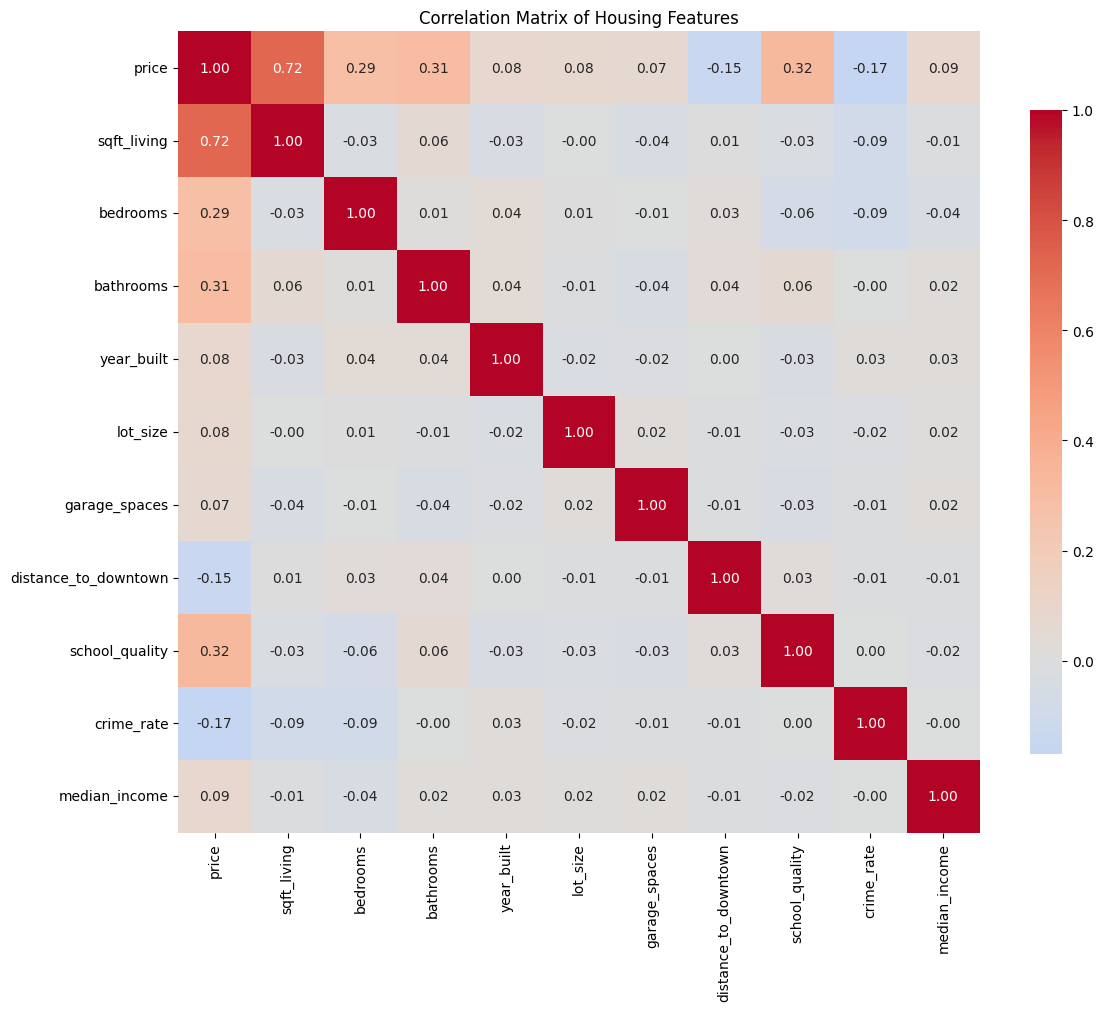

In [38]:
# Correlation analysis
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'year_built', 
                'lot_size', 'garage_spaces', 'distance_to_downtown', 
                'school_quality', 'crime_rate', 'median_income']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
print("Zoning types:")
print(df['zoning_type'].value_counts())
print("\nMissing values:")
print(df.isnull().sum())

Zoning types:
zoning_type
Residential    701
Mixed          195
Commercial     104
Name: count, dtype: int64

Missing values:
price                   0
sqft_living             0
bedrooms                0
bathrooms               0
year_built              0
lot_size                0
garage_spaces           0
distance_to_downtown    0
school_quality          0
crime_rate              0
median_income           0
zoning_type             0
dtype: int64


## Data Preprocessing

In [4]:
# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['zoning_encoded'] = le.fit_transform(df['zoning_type'])

# Create dummy variables for zoning type (properly encoded as 0/1)
zoning_dummies = pd.get_dummies(df['zoning_type'], prefix='zoning', dtype=int)
df_with_dummies = pd.concat([df, zoning_dummies], axis=1)

print("Zoning encoding mapping:")
for i, zone in enumerate(le.classes_):
    print(f"{zone}: {i}")

print(f"\nZoning dummy columns created: {list(zoning_dummies.columns)}")
print(f"Sample of dummy variables:")
print(zoning_dummies.head())

Zoning encoding mapping:
Commercial: 0
Mixed: 1
Residential: 2

Zoning dummy columns created: ['zoning_Commercial', 'zoning_Mixed', 'zoning_Residential']
Sample of dummy variables:
   zoning_Commercial  zoning_Mixed  zoning_Residential
0                  0             1                   0
1                  0             0                   1
2                  0             1                   0
3                  0             1                   0
4                  0             1                   0


## Question 1: Price Semi-Elasticity of Bedrooms

In [5]:
# Semi-elasticity requires log transformation of dependent variable
df_q1 = df.copy()
df_q1['log_price'] = np.log(df_q1['price'])

# Features for the model
X_q1 = df_q1[['bedrooms']]
y_q1 = df_q1['log_price']

# Fit linear regression
model_q1 = LinearRegression()
model_q1.fit(X_q1, y_q1)

# Semi-elasticity is the coefficient of bedrooms
semi_elasticity = model_q1.coef_[0]
r2_q1 = r2_score(y_q1, model_q1.predict(X_q1))

print(f"Price semi-elasticity of bedrooms: {semi_elasticity:.4f}")
print(f"This means a 1-unit increase in bedrooms increases price by {semi_elasticity*100:.2f}%")
print(f"R-squared: {r2_q1:.4f}")

Price semi-elasticity of bedrooms: 0.0346
This means a 1-unit increase in bedrooms increases price by 3.46%
R-squared: 0.0824


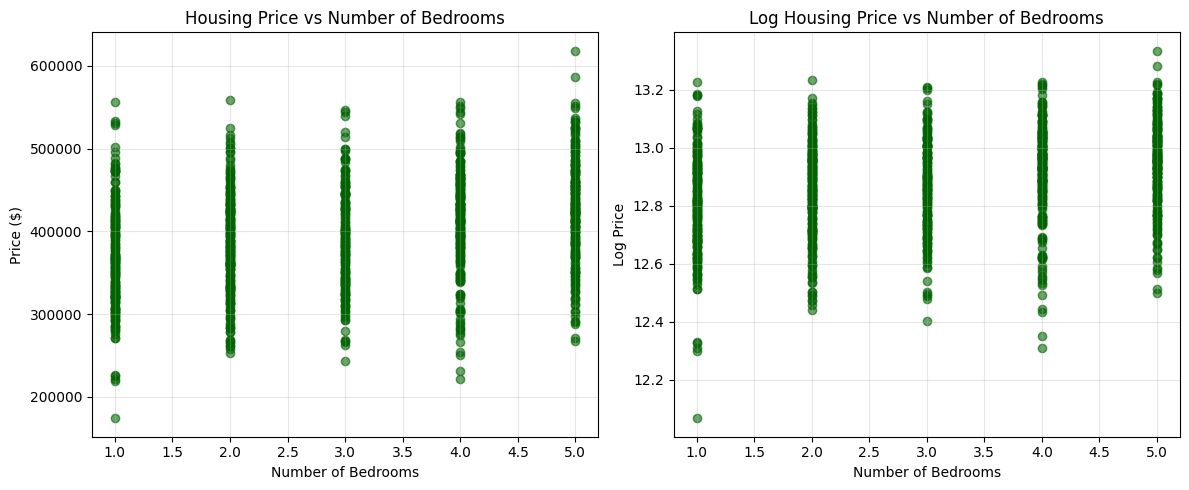

In [42]:
# Visualization for bedrooms vs price relationship
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['bedrooms'], df['price'], alpha=0.6, color='darkgreen')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('Housing Price vs Number of Bedrooms')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['bedrooms'], np.log(df['price']), alpha=0.6, color='darkgreen')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Price')
plt.title('Log Housing Price vs Number of Bedrooms')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bedrooms_vs_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 2: Effect of School Quality on Prices

In [6]:
# Linear regression with school quality as predictor
X_q2 = df[['school_quality']]
y_q2 = df['price']

model_q2 = LinearRegression()
model_q2.fit(X_q2, y_q2)

school_coef = model_q2.coef_[0]
intercept_q2 = model_q2.intercept_
r2_q2 = r2_score(y_q2, model_q2.predict(X_q2))

print(f"School quality coefficient: {school_coef:.2f}")
print(f"Intercept: {intercept_q2:.2f}")
print(f"R-squared: {r2_q2:.4f}")

if school_coef > 0:
    print(f"\nYES, housing prices increase with higher school quality score.")
    print(f"Each 1-point increase in school quality increases price by ${school_coef:.2f}")
else:
    print(f"\nNO, housing prices decrease with higher school quality score.")

School quality coefficient: 7004.19
Intercept: 358027.74
R-squared: 0.1031

YES, housing prices increase with higher school quality score.
Each 1-point increase in school quality increases price by $7004.19


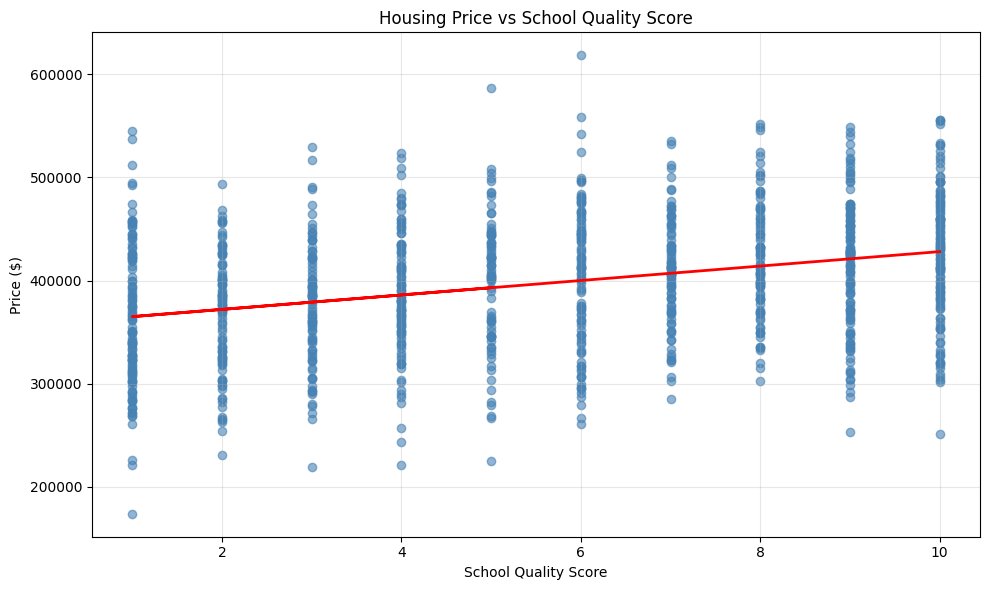

In [44]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['school_quality'], df['price'], alpha=0.6, color='steelblue')
plt.plot(df['school_quality'], model_q2.predict(X_q2), color='red', linewidth=2)
plt.xlabel('School Quality Score')
plt.ylabel('Price ($)')
plt.title('Housing Price vs School Quality Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('school_quality_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 3: Price Prediction for Specific House

In [7]:
# Build comprehensive model with all relevant features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'year_built', 'lot_size', 
           'garage_spaces', 'distance_to_downtown', 'school_quality', 
           'crime_rate', 'median_income']

# Add encoded zoning
X_full = df_encoded[features + ['zoning_encoded']]
y_full = df_encoded['price']

model_full = LinearRegression()
model_full.fit(X_full, y_full)

r2_full = r2_score(y_full, model_full.predict(X_full))
print(f"Full model R-squared: {r2_full:.4f}")

# House specifications
house_specs = {
    'sqft_living': 1200,
    'bedrooms': 3,
    'bathrooms': 2,
    'year_built': 1980,
    'lot_size': 1857,
    'garage_spaces': 0,
    'distance_to_downtown': 13.5,
    'school_quality': 1,
    'crime_rate': 14.2,
    'median_income': 67262,
    'zoning_encoded': 1  # Residential = 1 based on encoding
}

# Create prediction array
house_features = np.array([[house_specs[feature] for feature in features + ['zoning_encoded']]])

predicted_price = model_full.predict(house_features)[0]

print(f"\nHouse specifications:")
for key, value in house_specs.items():
    if key != 'zoning_encoded':
        print(f"{key}: {value}")
print(f"zoning_type: Residential")

print(f"\nPredicted price: ${predicted_price:,.2f}")

Full model R-squared: 0.9066

House specifications:
sqft_living: 1200
bedrooms: 3
bathrooms: 2
year_built: 1980
lot_size: 1857
garage_spaces: 0
distance_to_downtown: 13.5
school_quality: 1
crime_rate: 14.2
median_income: 67262
zoning_type: Residential

Predicted price: $258,203.92


/Users/ashishdate/Documents/IITJ/MLE_ass/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Question 4: Zoning Type Effects Across Zones

In [46]:
# Debug: Check data types and structure
print("All columns starting with 'zoning':")
all_zoning_cols = [col for col in df_with_dummies.columns if col.startswith('zoning')]
for col in all_zoning_cols:
    print(f"{col}: {df_with_dummies[col].dtype}, unique values: {df_with_dummies[col].unique()}")

print(f"\nNumeric zoning dummy columns only:")
zoning_dummy_cols = [col for col in df_with_dummies.columns if col.startswith('zoning_') and col != 'zoning_type']
for col in zoning_dummy_cols:
    print(f"{col}: {df_with_dummies[col].dtype}")

print(f"\nColumns to use in model (dropping last dummy): {zoning_dummy_cols[:-1]}")

All columns starting with 'zoning':
zoning_type: object, unique values: ['Mixed' 'Residential' 'Commercial']
zoning_Commercial: int64, unique values: [0 1]
zoning_Mixed: int64, unique values: [1 0]
zoning_Residential: int64, unique values: [0 1]

Numeric zoning dummy columns only:
zoning_Commercial: int64
zoning_Mixed: int64
zoning_Residential: int64

Columns to use in model (dropping last dummy): ['zoning_Commercial', 'zoning_Mixed']


In [8]:
# Analyze effect of zoning type using dummy variables
zoning_features = ['sqft_living', 'bedrooms', 'bathrooms', 'year_built', 'lot_size',
                  'garage_spaces', 'distance_to_downtown', 'school_quality', 
                  'crime_rate', 'median_income']

# Get only the numeric dummy columns (exclude original zoning_type column)
zoning_dummy_cols = [col for col in df_with_dummies.columns if col.startswith('zoning_') and col != 'zoning_type']
print(f"Zoning dummy columns: {zoning_dummy_cols}")

# Use all features plus zoning dummies (drop one dummy to avoid multicollinearity)
X_zoning = df_with_dummies[zoning_features + zoning_dummy_cols[:-1]]
y_zoning = df_with_dummies['price']

print(f"Features used: {zoning_features + zoning_dummy_cols[:-1]}")
print(f"X_zoning shape: {X_zoning.shape}")

model_zoning = LinearRegression()
model_zoning.fit(X_zoning, y_zoning)

r2_zoning = r2_score(y_zoning, model_zoning.predict(X_zoning))
print(f"Zoning model R-squared: {r2_zoning:.4f}")

# Extract zoning coefficients
zoning_coefs = {}
for i, col in enumerate(zoning_dummy_cols[:-1]):
    zoning_coefs[col] = model_zoning.coef_[len(zoning_features) + i]

print("\nZoning type effects (relative to baseline):")
for zone, coef in zoning_coefs.items():
    print(f"{zone}: ${coef:,.2f}")

# Check if effects are significantly different
coef_values = list(zoning_coefs.values())
coef_range = max(coef_values) - min(coef_values)
print(f"\nRange of zoning effects: ${coef_range:,.2f}")

if coef_range > 10000:  # Arbitrary threshold for practical significance
    print("YES, the effect of zoning type on prices is different across zones.")
else:
    print("NO, the effect of zoning type on prices is similar across zones.")

Zoning dummy columns: ['zoning_Commercial', 'zoning_Mixed', 'zoning_Residential']
Features used: ['sqft_living', 'bedrooms', 'bathrooms', 'year_built', 'lot_size', 'garage_spaces', 'distance_to_downtown', 'school_quality', 'crime_rate', 'median_income', 'zoning_Commercial', 'zoning_Mixed']
X_zoning shape: (1000, 12)
Zoning model R-squared: 0.9081

Zoning type effects (relative to baseline):
zoning_Commercial: $-30,674.08
zoning_Mixed: $-8,177.67

Range of zoning effects: $22,496.41
YES, the effect of zoning type on prices is different across zones.


Average prices by zoning type:
                      mean           std  count
zoning_type                                    
Commercial   369733.490385  67255.024009    104
Mixed        393273.533333  65020.763263    195
Residential  402160.435093  64599.511283    701


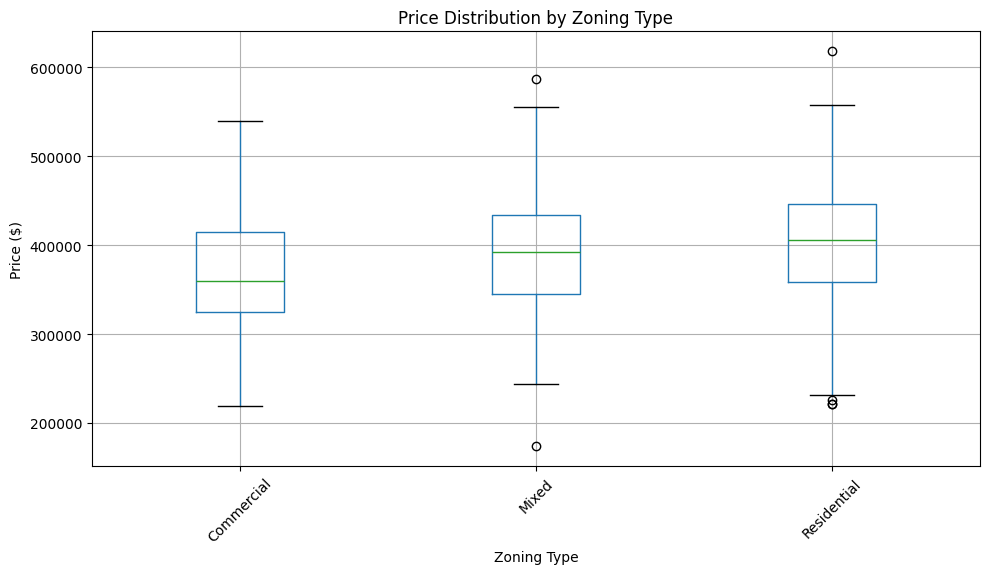

In [9]:
# Additional analysis: Average prices by zone
zone_analysis = df.groupby('zoning_type')['price'].agg(['mean', 'std', 'count'])
print("Average prices by zoning type:")
print(zone_analysis)

# Visualization
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='zoning_type', ax=plt.gca())
plt.title('Price Distribution by Zoning Type')
plt.suptitle('')  # Remove default title
plt.ylabel('Price ($)')
plt.xlabel('Zoning Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_distribution_by_zoning.png', dpi=300, bbox_inches='tight')
plt.show()